### Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

### Loading of dataset

In [3]:
data = load_iris()

In [4]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

### EDA

#### Creation of dataframe from data

In [7]:
df = pd.DataFrame(data.data,columns = data.feature_names)

In [9]:
df['Target'] = data.target

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#### couting the samples for each class

In [13]:
from collections import Counter
count = Counter(df.Target)
print(count)

Counter({0: 50, 1: 50, 2: 50})


### checking for any nan values

In [14]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

#### finding the correlation between the features

In [15]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [16]:
#by finding this correlation values we can use one feauter to fill the nan values of another feature by buiding ml models over that both feature

#### graphical representation for each feature related to target

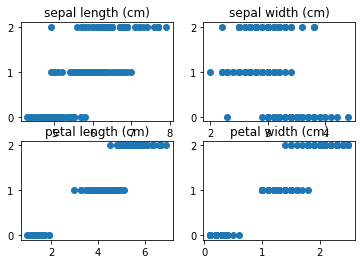

In [74]:

count = 4
for i in range(count):
    plt.subplot(2,2,i+1)
    plt.scatter(df[data.feature_names[i]],df['Target'])
    plt.title(data.feature_names[i])
plt.show()

In [40]:
X = data.data
y = data.target

#### Splitting the data into train and test

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

#### Creating a Kneighbors Classifier model with hyperparameter turning

In [140]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
from scipy.stats import randint
param = {
    'n_neighbors' : randint(1,20)
}
RSCV = RandomizedSearchCV(estimator = model,param_distributions = param,cv = 10,n_iter=20)
RSCV.fit(X_train,y_train)
Final_model = RSCV.best_estimator_

#### Accuracy score of training data

In [141]:
print("Training Accuracy : ",Final_model.score(X_train,y_train)*100,'%')

Training Accuracy :  97.32142857142857 %


#### Test Accuracy

In [142]:
print("Testing Accuracy : ",Final_model.score(X_test,y_test)*100,'%')

Testing Accuracy :  97.36842105263158 %


#### Building classification report to check the precision and recall values which define how well our model is trained

In [143]:
y_pred = Final_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### Confusion matrix

In [77]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Text(0.5, 1.0, 'CONFUSION MATRIX')

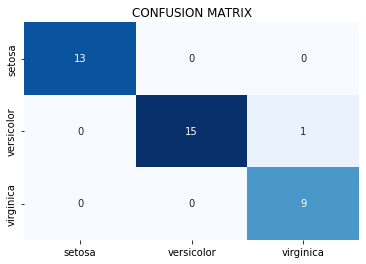

In [144]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['setosa', 'versicolor', 'virginica'],
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.title('CONFUSION MATRIX')

#### User Input

In [157]:
SL = float(input("sepal_length (cm) : "))
SW = float(input("sepal_width (cm) : "))
PL = float(input("petal_length (cm) : "))
PW = float(input("petal_width (cm) : "))
input_array = np.array([[SL,SW,PL,PW]])
temp = Final_model.predict(input_array)[0]
print("**********")
print("THE OUTPUT CLASSIFIED AS : ",data.target_names[temp])

sepal_length (cm) : 2
sepal_width (cm) : 2
petal_length (cm) : 2
petal_width (cm) : 2
**********
THE OUTPUT CLASSIFIED AS :  virginica
